# 구글 드라이브 연동

In [56]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Mecab 설치

In [ ]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 60 (delta 23), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (60/60), done.


In [ ]:
!ls

gdrive	Mecab-ko-for-Google-Colab  sample_data


In [ ]:
!bash /content/Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 3.8MB 46.9MB/s 
     |████████████████████████████████| 92kB 12.4MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2020-08-30 06:58:47--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.2, 18.205.93.0, 18.205.93.1, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?

In [57]:
from konlpy.tag import Mecab

In [58]:
mecab = Mecab()

In [59]:
text = '안녕하세요. 제 이름은 홍길동 입니다. 만나서 반갑습니다.'

In [60]:
noouns = mecab.nouns(text)

In [61]:
noouns

['안녕', '제', '이름', '홍길동']

# 데이터 로드

In [62]:
import numpy as np
import pandas as pd
# import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
np.random.seed(seed=0)

In [63]:
data_path = '/content/gdrive/My Drive/Colab Notebooks/5.자연어처리&추천시스템(김준태)/mini_pro/'

In [154]:
data = pd.read_csv(data_path + 'reversed_data_after_preprocessing.csv', nrows=5000)
print(len(data))

5000


In [155]:
data.head()

,title,content
0,서해상으로 북상 중인 태풍 바비 피해 줄이려면,Q 특히 농어촌에서 어떤 피해가 발생할지가 걱정인데요 Q 도심 집에 계신 ...
1,새벽 4시 5시 사이 서울 근접 이 시각 서울시 재난안전상황실,만약 이런 피해가 발생하면 가까운 구청 상황실이나 다산콜센터 등에 연락하시면 됩니...
2,코로나 때문에 봉사시간 못 채워 졸업 막힌 대학생들,정부 차원의 대책 마련이 필요하다는 의견도 나온다 코로나19라는 비상 상황인 만...
3,성인 남자가 서 있기 힘들 정도 태풍 바비 군산 도착,지금까지 전북 군산 비응항에서 YTN 김민성 입니다 이번 태풍 아무쪼록 큰 피해 ...
4,위험 반원 인천 초비상 초속 25m 넘으면 영종대교 통제,또 초속 25m 이상 바람이 불 경우 인천공항으로 향하는 영종대교와 인천대교 차량 ...


# 데이터 정제

In [156]:
# 중복을 제외한 행의 수 확인
print(len(data))
print(data['title'].nunique())
print(data['content'].nunique())

5000
4855
4914


In [157]:
# title 중복 제거
data.drop_duplicates(subset=['title'], inplace=True)
print(len(data))

4855


In [158]:
# content 중복 제거
data.drop_duplicates(subset=['content'], inplace=True)
print(len(data))

4825


In [159]:
# 결측치 제거
data = data.dropna(axis=0)
print(len(data))

4824


제목의 최소 길이 : 1
제목의 최대 길이 : 18
제목의 평균 길이 : 8.124585406301824
내용의 최소 길이 : 28
내용의 최대 길이 : 3480
내용의 평균 길이 : 260.4278606965174


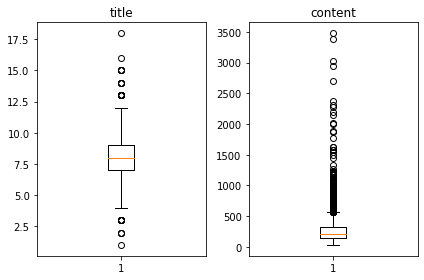

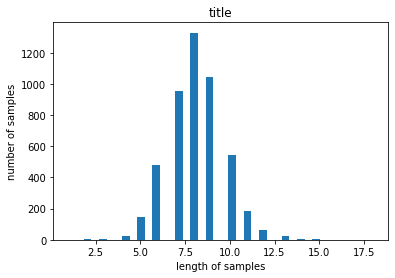

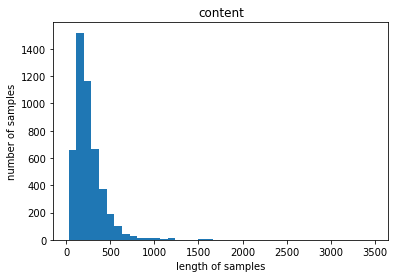

In [160]:
# 데이터 시각화로 확인
title_len = [len(t.split()) for t in data['title']]
content_len = [len(c.split()) for c in data['content']]

print('제목의 최소 길이 : {}'.format(np.min(title_len)))
print('제목의 최대 길이 : {}'.format(np.max(title_len)))
print('제목의 평균 길이 : {}'.format(np.mean(title_len)))
print('내용의 최소 길이 : {}'.format(np.min(content_len)))
print('내용의 최대 길이 : {}'.format(np.max(content_len)))
print('내용의 평균 길이 : {}'.format(np.mean(content_len)))

plt.subplot(1,2,1)
plt.boxplot(title_len)
plt.title('title')
plt.subplot(1,2,2)
plt.boxplot(content_len)
plt.title('content')
plt.tight_layout()
plt.show()

plt.title('title')
plt.hist(title_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('content')
plt.hist(content_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [161]:
title_max_len = 12
content_max_len = 600

In [162]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [163]:
below_threshold_len(title_max_len, data['title'])

전체 샘플 중 길이가 12 이하인 샘플의 비율: 0.9925373134328358


In [164]:
below_threshold_len(content_max_len, data['content'])

전체 샘플 중 길이가 600 이하인 샘플의 비율: 0.9626865671641791


In [165]:
data = data[data['title'].apply(lambda t: len(t.split()) <= title_max_len)]
data = data[data['content'].apply(lambda c: len(c.split()) <= content_max_len)]
print(len(data))

4613


In [166]:
# data['decoder_input'] = data['title'].apply(lambda x : 'start '+ x)
# data['decoder_target'] = data['title'].apply(lambda x : x + ' end')
# data.head()

In [167]:
encoder = np.array(data['content'])
decoder = np.array(data['title'])
# decoder_target = np.array(data['decoder_target'])

# 정수 인코딩

In [168]:
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [169]:
content_tokenizer = Mecab()
title_tokenizer = Mecab()

In [170]:
encoder_input_tokenized = []
decoder_input_tokenized = []
decoder_target_tokenized = []

for sentence in encoder:
    temp = []
    temp = content_tokenizer.morphs(sentence)
    temp = [word for word in temp if not word in stopwords]
    encoder_input_tokenized.append(temp)

for sentence in decoder:
    temp = []
    temp = title_tokenizer.morphs(sentence)
    temp = [word for word in temp if not word in stopwords]
    temp.insert(0,'<start>')
    decoder_input_tokenized.append(temp)

for sentence in decoder:
    temp = []
    temp = title_tokenizer.morphs(sentence)
    temp = [word for word in temp if not word in stopwords]
    temp.append('<end>')
    decoder_target_tokenized.append(temp)

In [171]:
print(encoder_input_tokenized[:5])
print(decoder_input_tokenized[:5])
print(decoder_target_tokenized[:5])

[['Q', '특히', '농어촌', '에서', '어떤', '피해', '발생', '할지', '걱정', '인데요', 'Q', '도심', '집', '계신', '분', '어떻게', '대비', '해야', '합니까', 'Q', '특히', '고층', '아파트', '유리창', '깨지', '피해', '태풍', '때', '종종', '발생', '했잖아요', '그때', '신문지', '붙인다', '든가', '테이프', '붙여', '놓', '으면', '예방', '되', '나요', 'Q', '요즘', '창틀', '창틀', '사이', '헐거운', '부분', '을', '고정', '하', '게', '중요', '하', '다고', '하', '던데', 'Q', '태풍', '한창', '일', '때', '운전', '을', '하', '지', '않', '게', '가장', '좋', '겠', '습니다', '만', '어쩔', '수', '없이', '운전', '을', '해야', '되', '경우', '있', '잖아요', '이럴', '때', '어떻게', '조심', '해야', '됩니까', 'Q', '도심', '강풍', '피해', '로', '대표', '적', '간판', '떨어진다', '든가', '교회', '첨탑', '무너지', '경우', '있', '었', '습니다', 'Q', '이렇게', '서해', '상', '태풍', '올라오', '면', '주로', '어떤', '피해', '발생', '하', '나요', '이번', '바람', '피해', '강할', '것', '같', '습니다', '강원', '대학교', '방재', '전문', '대학원', '김병식', '교수', '님', '모시', '고', '태풍', '피해', '어떻게', '대응', '해야', '하', '는지', '자세', '얘기', '나눠', '보', '겠', '습니다'], ['만약', '이런', '피해', '발생', '하', '면', '가까운', '구청', '상황실', '이나', '다산', '콜', '센터', '등', '연락', '하', '시', '면', '됩니다', '또',

In [172]:
# 단어 집합의 크기
from nltk import FreqDist

encoder_vocab = FreqDist(np.hstack(encoder_input_tokenized))
i_decoder_vocab = FreqDist(np.hstack(decoder_input_tokenized))
t_decoder_vocab = FreqDist(np.hstack(decoder_target_tokenized))

print(len(encoder_vocab))
print(len(i_decoder_vocab))
print(len(t_decoder_vocab))

26560
6768
6768


In [173]:
encoder_vocab_size = 25000
decoder_vocab_size = 6000

encoder_vocab = encoder_vocab.most_common(encoder_vocab_size)
i_decoder_vocab = i_decoder_vocab.most_common(decoder_vocab_size)
t_decoder_vocab = t_decoder_vocab.most_common(decoder_vocab_size)

print(len(encoder_vocab))
print(len(i_decoder_vocab))
print(len(t_decoder_vocab))

25000
6000
6000


In [183]:
encoder_input_word_to_index = {word[0]: index + 2 for index, word in enumerate(encoder_vocab)}
decoder_input_word_to_index = {word[0]: index + 3 for index, word in enumerate(i_decoder_vocab)}
decoder_target_word_to_index = {word[0]: index + 3 for index, word in enumerate(t_decoder_vocab)}

In [265]:
print(encoder_input_word_to_index) # content
print(decoder_input_word_to_index) # title
print(decoder_target_word_to_index) # title

{'다': 2, '을': 3, '고': 4, '하': 5, '있': 6, '했': 7, '일': 8, '에서': 9, '명': 10, '로': 11, '확진': 12, '것': 13, '등': 14, '습니다': 15, '코로나': 16, '지': 17, '해': 18, '적': 19, '받': 20, '19': 21, '인': 22, '1': 23, '됐': 24, '시': 25, '기': 26, '수': 27, '2': 28, '씨': 29, '할': 30, '면': 31, '되': 32, '서울': 33, '며': 34, '3': 35, '않': 36, '된': 37, '까지': 38, '지난': 39, '태풍': 40, '중': 41, '게': 42, '만': 43, '었': 44, '대': 45, '감염': 46, '어': 47, '방역': 48, '면서': 49, '았': 50, '전': 51, '지역': 52, '검사': 53, '.': 54, '라고': 55, '없': 56, '25': 57, '다고': 58, '월': 59, '부터': 60, '권': 61, 'A': 62, '발생': 63, '환자': 64, '교회': 65, '병원': 66, '26': 67, '이날': 68, '8': 69, '관련': 70, '던': 71, '지만': 72, '밝혔': 73, '말': 74, '정부': 75, '의료': 76, '상황': 77, '판정': 78, '번': 79, '한다': 80, '원': 81, '겠': 82, '다는': 83, '년': 84, '오후': 85, '조사': 86, '4': 87, '5': 88, '확산': 89, '오전': 90, '입니다': 91, '집회': 92, '24': 93, '대한': 94, '수도': 95, '마스크': 96, '주': 97, '에게': 98, '피해': 99, '집단': 100, '개': 101, '아': 102, '차': 103, '단계': 104, '안': 105, '추가': 106, '의사

In [219]:
# print(decoder_target_word_to_index['end'])
# print(decoder_target_word_to_index)
print(max(encoder_input_word_to_index.values()))
print(max(decoder_input_word_to_index.values()))
print(max(decoder_target_word_to_index.values()))
# print(decoder_input_word_to_index)
# print(decoder_target_word_to_index)

25001
6002
6002


In [188]:
input_encoded = []
input_decoded = []
target_decoded = []

for i in encoder_input_tokenized:
    temp = []
    for w in i:
        try:
            temp.append(encoder_input_word_to_index[w])
        except KeyError:
            temp.append(1)
    input_encoded.append(temp)

for i in decoder_input_tokenized:
    temp = []
    for w in i:
        try:
            if w == '<start>':
                temp.append(2)
            else:
                temp.append(decoder_input_word_to_index[w])
        except KeyError:
            temp.append(1)
    input_decoded.append(temp)

for i in decoder_target_tokenized:
    temp = []
    for w in i:
        try:
            temp.append(decoder_target_word_to_index[w])
        except KeyError:
            temp.append(1)
    target_decoded.append(temp)

In [189]:
print(input_encoded[:5])
print(input_decoded[:5])
print(decoder_input_tokenized)
print(target_decoded[:5])
print(decoder_target_tokenized)

[[3068, 313, 5624, 9, 882, 99, 63, 1411, 747, 1088, 3068, 1301, 349, 3694, 138, 826, 334, 169, 9963, 3068, 313, 7160, 497, 2267, 3511, 99, 40, 152, 4896, 63, 11887, 3379, 5278, 15313, 13277, 3069, 4472, 707, 498, 715, 32, 2994, 3068, 3035, 3469, 3469, 471, 15314, 654, 3, 1704, 5, 42, 659, 5, 58, 5, 9964, 3068, 40, 5466, 8, 152, 2023, 3, 5, 17, 36, 42, 244, 666, 82, 15, 43, 3332, 27, 440, 2023, 3, 169, 32, 124, 6, 3630, 6384, 152, 826, 2124, 169, 8276, 3068, 1301, 246, 99, 11, 328, 19, 1279, 9301, 13277, 65, 6173, 2500, 124, 6, 44, 15, 3068, 883, 676, 198, 40, 1971, 31, 1575, 882, 99, 63, 5, 2994, 174, 172, 99, 3971, 13, 143, 15, 711, 1348, 4473, 903, 2125, 18787, 388, 682, 9965, 4, 40, 99, 826, 305, 169, 5, 519, 1609, 1266, 2193, 108, 82, 15], [1883, 525, 99, 63, 5, 31, 1674, 1250, 1445, 262, 10802, 2643, 268, 14, 871, 5, 25, 31, 577, 122, 2141, 1109, 1035, 6, 3, 27, 6, 15, 2108, 5279, 262, 3036, 587, 1279, 497, 2267, 14, 172, 2358, 31, 178, 15315, 27, 6, 355, 1333, 3, 5, 17, 36, 42, 2

# 빈 샘플 제거

In [190]:
drop_row = [index for index, sentence in enumerate(input_decoded) if len(sentence) == 1]

In [191]:
print(len(drop_row))

0


# 패딩

In [192]:
max_len = max(len(l) for l in input_encoded)
print(max_len)

1001


In [193]:
max_len = max(len(l) for l in input_decoded)
print(max_len)

21


In [194]:
input_encoded = pad_sequences(input_encoded, padding='post')
input_decoded = pad_sequences(input_decoded, padding='post')
target_decoded = pad_sequences(target_decoded, padding='post')

In [195]:
print(input_encoded.shape)
print(input_decoded.shape)
print(target_decoded.shape)

(4613, 1001)
(4613, 21)
(4613, 21)


In [196]:
print(input_encoded[:3])
print(input_decoded[:3])
print(target_decoded[:3])

[[3068  313 5624 ...    0    0    0]
 [1883  525   99 ...    0    0    0]
 [  75 1319  201 ...    0    0    0]]
[[   2  900   79   80   28  169    7   20   62 1358 1809    0    0    0
     0    0    0    0    0    0    0]
 [   2  319   56   59   45   59  901   24  208  306  154  146  490 2174
     0    0    0    0    0    0    0]
 [   2    6  417 3832  251   96 3833 2175 1556 2753    0    0    0    0
     0    0    0    0    0    0    0]]
[[ 900   79   80   28  169    7   20   62 1358 1809    3    0    0    0
     0    0    0    0    0    0    0]
 [ 319   56   59   45   59  901   24  208  306  154  146  490 2174    3
     0    0    0    0    0    0    0]
 [   6  417 3832  251   96 3833 2175 1556 2753    3    0    0    0    0
     0    0    0    0    0    0    0]]


# 데이터 분리

In [197]:
indices = np.arange(input_encoded.shape[0])
np.random.shuffle(indices)
print(indices)

[3608 4346 3845 ... 4119 3525 4379]


In [198]:
input_encoded = input_encoded[indices]
input_decoded = input_decoded[indices]
target_decoded = target_decoded[indices]

In [199]:
n_of_val = int(len(input_encoded)*0.2)
print('테스트 데이터의 수 :',n_of_val)

테스트 데이터의 수 : 922


In [200]:
input_encoded_train = input_encoded[:-n_of_val]
input_decoded_train = input_decoded[:-n_of_val]
target_decoded_train = target_decoded[:-n_of_val]

input_encoded_test = input_encoded[-n_of_val:]
input_decoded_test = input_decoded[-n_of_val:]
target_decoded_test = target_decoded[-n_of_val:]

In [201]:
print('훈련 데이터의 개수 :', len(input_encoded_train))
print('훈련 레이블의 개수 :',len(input_decoded_train))
print('테스트 데이터의 개수 :',len(input_encoded_test))
print('테스트 레이블의 개수 :',len(input_decoded_test))

훈련 데이터의 개수 : 3691
훈련 레이블의 개수 : 3691
테스트 데이터의 개수 : 922
테스트 레이블의 개수 : 922


# Training

In [220]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Masking
from tensorflow.keras.models import Model

In [251]:
# 인코더 모델
encoder_inputs = Input(shape=(1001,))

encoder_embed = Embedding(len(encoder_vocab)+2, 50)(encoder_inputs)
encoder_mask = Masking(mask_value=0)(encoder_embed)

encoder_outputs, h_state, c_state = LSTM(50, return_state=True)(encoder_mask)

In [252]:
# 디코더 모델
decoder_inputs = Input(shape=(21,))

decoder_embed = Embedding(len(i_decoder_vocab)+3, 50)(decoder_inputs)
decoder_mask = Masking(mask_value=0)(decoder_embed)

decoder_lstm = LSTM(50, return_sequences=True, return_state=True)

decoder_outputs, _, _ = decoder_lstm(decoder_mask, initial_state=[h_state, c_state])

decoder_dense = Dense(len(t_decoder_vocab)+3, activation='softmax')
decoder_softmax_outputs = decoder_dense(decoder_outputs)

In [253]:
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

model.fit(x = [input_encoded_train, input_decoded_train], y = target_decoded_train, validation_data = ([input_encoded_test, input_decoded_test], target_decoded_test), batch_size = 128, epochs = 50)

Epoch 1/50
29/29 [==============================] - 50s 2s/step - loss: 7.5623 - acc: 0.4063 - val_loss: 6.4705 - val_acc: 0.4198
Epoch 2/50
29/29 [==============================] - 49s 2s/step - loss: 5.8349 - acc: 0.4190 - val_loss: 5.3455 - val_acc: 0.4193
Epoch 3/50
29/29 [==============================] - 49s 2s/step - loss: 4.9336 - acc: 0.4189 - val_loss: 4.7116 - val_acc: 0.4193
Epoch 4/50
29/29 [==============================] - 49s 2s/step - loss: 4.4930 - acc: 0.4189 - val_loss: 4.4679 - val_acc: 0.4193
Epoch 5/50
29/29 [==============================] - 50s 2s/step - loss: 4.3055 - acc: 0.4189 - val_loss: 4.3390 - val_acc: 0.4193
Epoch 6/50
29/29 [==============================] - 50s 2s/step - loss: 4.1815 - acc: 0.4189 - val_loss: 4.2621 - val_acc: 0.4193
Epoch 7/50
29/29 [==============================] - 50s 2s/step - loss: 4.0848 - acc: 0.4218 - val_loss: 4.1963 - val_acc: 0.4272
Epoch 8/50
29/29 [==============================] - 50s 2s/step - loss: 4.0137 - acc: 0.44

In [ ]:
content_index_to_word =  # 원문 단어 집합에서 정수 -> 단어를 얻음
title_word_to_index =  decoder_target_word_to_index # 요약 단어 집합에서 단어 -> 정수를 얻음
title_index_to_word =  # 요약 단어 집합에서 정수 -> 단어를 얻음

In [254]:
encoder_model = Model(encoder_inputs, [h_state, c_state])

In [255]:
encoder_h_state = Input(shape=(50,))
encoder_c_state = Input(shape=(50,))

pd_decoder_outputs, pd_h_state, pd_c_state = decoder_lstm(decoder_mask, initial_state=[encoder_h_state, encoder_c_state])
pd_decoder_softmax_outputs = decoder_dense(pd_decoder_outputs)

decoder_model = Model([decoder_inputs] + [encoder_h_state, encoder_c_state], [pd_decoder_softmax_outputs] + [pd_h_state, pd_c_state])

In [257]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = title_word_to_index['<start>']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = title_index_to_word[sampled_token_index]

        if(sampled_token!='<end>'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == '<end>'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [258]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if(i!=0):
            temp = temp + content_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if((i!=0 and i!=title_word_to_index['<start>']) and i!=title_word_to_index['<end>']):
            temp = temp + title_index_to_word[i] + ' '
    return temp

In [260]:
for i in range(500, 1000):
    print("원문 : ",seq2text(input_encoded_test[i]))
    print("실제 요약문 :",seq2summary(input_decoded_test[i]))
    print("예측 요약문 :",decode_sequence(input_encoded_test[i].reshape(1, text_max_len)))
    print("\n")

NameError: ignored